<a href="https://colab.research.google.com/github/juanestebanperezm/data_analytics/blob/main/genshin_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/content/genshin.csv')

df

,character_name,vision,region,model,birthday,weapon_type,rarity,ascension,ascension_specialty,ascension_enemy_mat,ascension_boss_mat,talent_book,talent_mat,hp_90,atk_90,def_90,playable
0,Albedo,Geo,Mondstadt,Medium Male,13-Sep,Sword,5.0,Geo DMG Bonus,Cecilia,Divining Scroll,Basalt Pillar,Teachings of Ballad,Tusk of Monoceros Caeli,13226.0,251.0,876.0,Y
1,Aloy,Cryo,NaN,Medium Female,4-Apr,Bow,5.0,Cryo DMG Bonus,Crystal Marrow,Spectral Husk,Crystalline Bloom,Teachings of Freedom,Molten Moment,10899.0,234.0,676.0,Y
2,Amber,Pyro,Mondstadt,Medium Female,10-Aug,Bow,4.0,ATK,Small Lamp Grass,Firm Arrowhead,Everflame Seed,Teachings of Freedom,Dvalin's Sigh,9461.0,223.0,601.0,Y
3,Arataki Itto,Geo,Inazuma,Tall Male,1-Jun,Claymore,5.0,CRIT Rate,Onikabuto,Slime Condensate,Riftborn Regalia,Teachings of Elegance,Ashen Heart,12858.0,227.0,959.0,Y
4,Barbara,Hydro,Mondstadt,Medium Female,5-Jul,Catalyst,4.0,HP,Philanemo Mushroom,Divining Scroll,Cleansing Heart,Teachings of Freedom,Ring of Boreas,9787.0,159.0,669.0,Y
5,Beidou,Electro,Liyue,Tall Female,14-Feb,Claymore,4.0,Electro DMG Bonus,Noctilucous Jade,Treasure Hoarder Insignia,Lightning Prism,Teachings of Gold,Dvalin's Sigh,13050.0,225.0,648.0,Y
6,Bennett,Pyro,Mondstadt,Medium Male,1-Feb,Sword,4.0,Energy Recharge,Windwheel Aster,Treasure Hoarder Insignia,Everflame Seed,Teachings of Resistance,Dvalin's Plume,12397.0,191.0,771.0,Y
7,Chongyun,Cryo,Liyue,Medium Male,7-Sep,Claymore,4.0,ATK,Cor Lapis,Damaged Mask,Hoarfrost Core,Teachings of Diligence,Dvalin's Sigh,10984.0,223.0,648.0,Y
8,Dainsleif,Unknown,Khaenri'ah,Tall Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,Diluc,Pyro,Mondstadt,Tall Male,30-Apr,Claymore,5.0,CRIT Rate,Small Lamp Grass,Recruit's Insignia,Everflame Seed,Teachings of Resistance,Dvalin's Plume,12981.0,335.0,784.0,Y


**Cuantos personajes hay de 5 estrellas y cuantos hay de 4 estrellas**

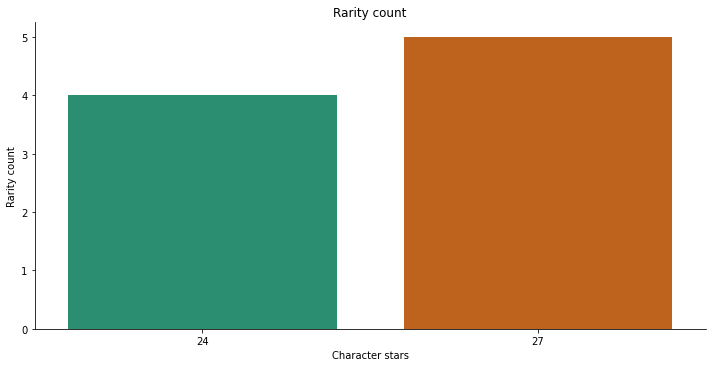

In [2]:
rarity=df[['character_name','rarity']].dropna().groupby('rarity').count().reset_index()

sns.catplot(
            x='character_name',
            y='rarity',
            data=rarity,
            kind='bar',
            aspect=2,
            palette='Dark2'
)
plt.title('Rarity count')
plt.xlabel('Character stars')
plt.ylabel('Rarity count')
plt.show()


**Rareza por elemento**

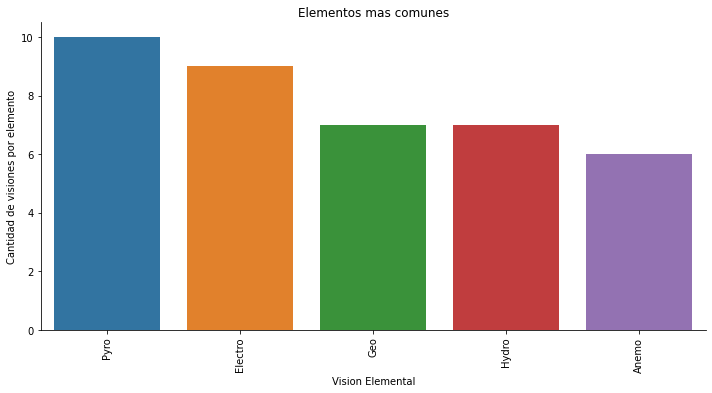

In [3]:

element=df[['vision','rarity']].groupby('vision').count().sort_values(by='rarity',ascending=False).reset_index()[1:6]

sns.catplot(data=element,
            x='vision',
            y='rarity',
            aspect=2,
            kind='bar',
            palette='tab10')
plt.title('Elementos mas comunes')
plt.xticks(rotation=90)
plt.xlabel('Vision Elemental')
plt.ylabel('Cantidad de visiones por elemento')
plt.show()

**Regiones con mas visiones**

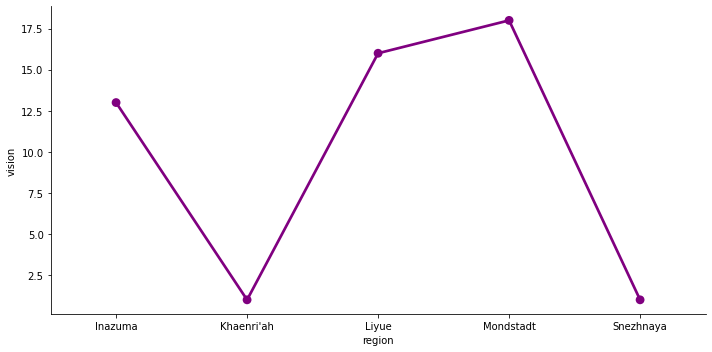

In [4]:

region_vision=df[['vision','region']].dropna().groupby('region').count().reset_index()

sns.catplot(
    data=region_vision,
    x='region',
    y='vision',
    kind='point',
    color='purple',
    aspect=2)

**Armas mas comunes en el juego**

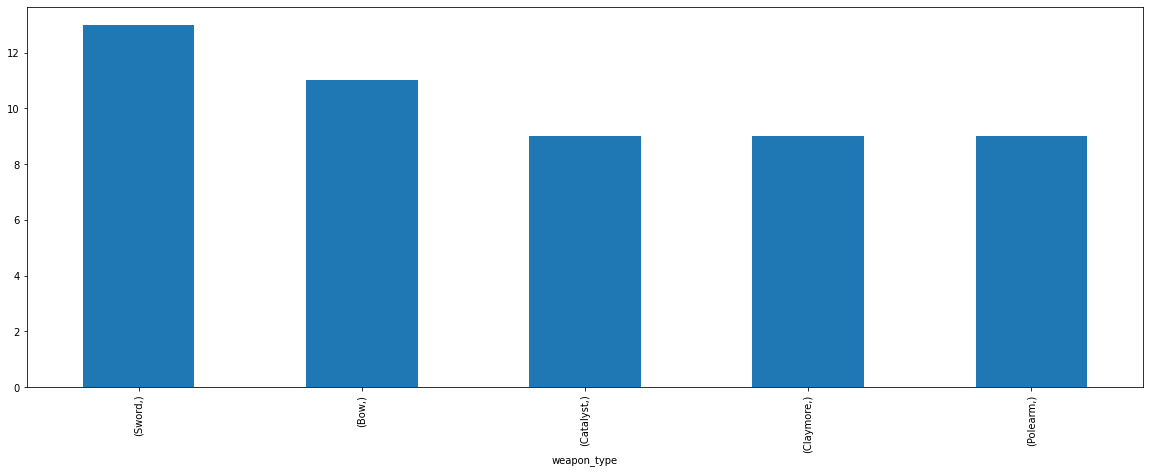

In [5]:
weapons=df[['weapon_type']].value_counts()
weapons.plot.bar(figsize=(20,7))

**Top 10 personajes con mas ataque**

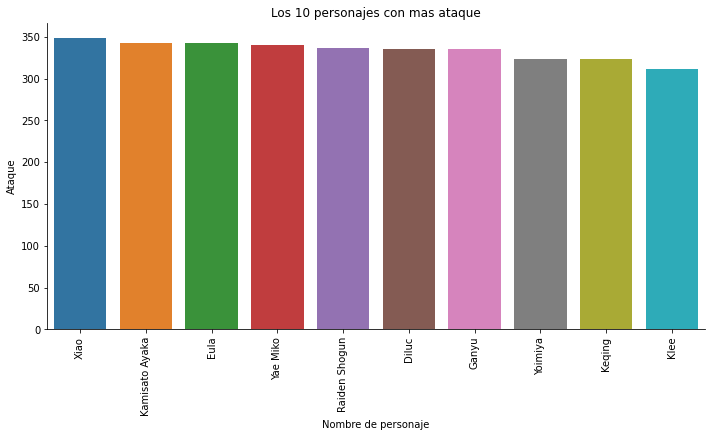

In [6]:
ataque=df[['character_name','atk_90']].groupby('character_name').mean().sort_values(by='atk_90',ascending=False).reset_index().dropna().head(10)

sns.catplot(data=ataque,x='character_name',y='atk_90',kind='bar',aspect=2)
plt.title('Los 10 personajes con mas ataque')
plt.xticks(rotation=90)
plt.xlabel('Nombre de personaje')
plt.ylabel('Ataque')
plt.show()

**Top 10 personajes con mas defensa**

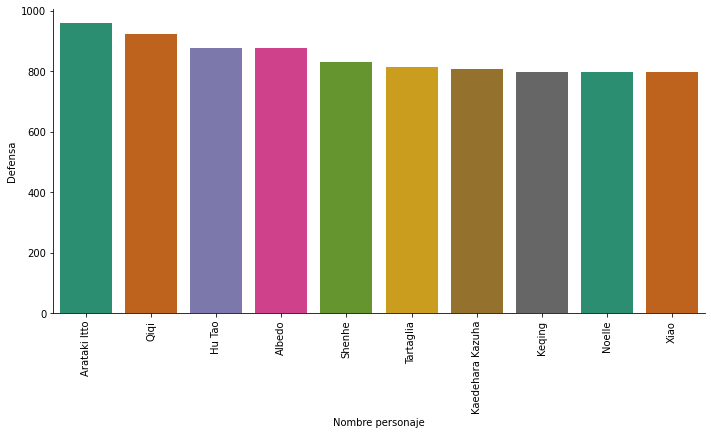

In [7]:
defensa=df[['character_name','def_90']].groupby('character_name').mean().dropna().reset_index().sort_values(by='def_90',ascending=False).head(10)

sns.catplot(data=defensa,palette='Dark2',x='character_name',y='def_90',kind='bar',aspect=2)
plt.xticks(rotation=90)
plt.ylabel('Defensa')
plt.xlabel('Nombre personaje')
plt.show()

**Modelos mas comunes en la rareza de los personajes**

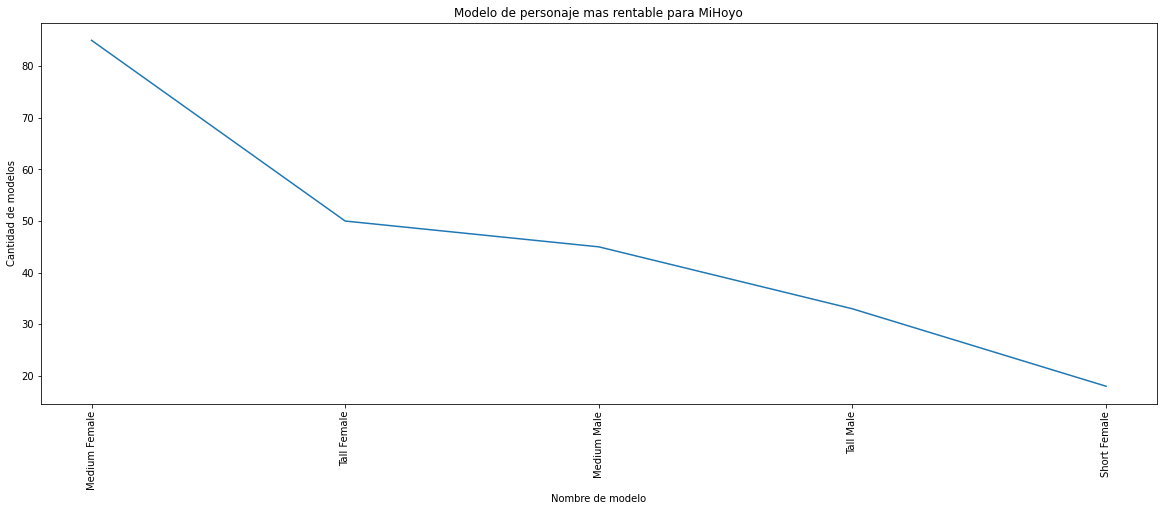

In [8]:
comun=df[['model','rarity']].groupby('model').sum().reset_index().sort_values(by='rarity',ascending=False)

plt.figure(figsize=(20,7))
sns.lineplot(
            data=comun,x='model',
            y='rarity',
            palette='hsv')

plt.title('Modelo de personaje mas rentable para MiHoyo')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de modelos')
plt.xlabel('Nombre de modelo')
plt.show()

**Material de ascension mas comun**

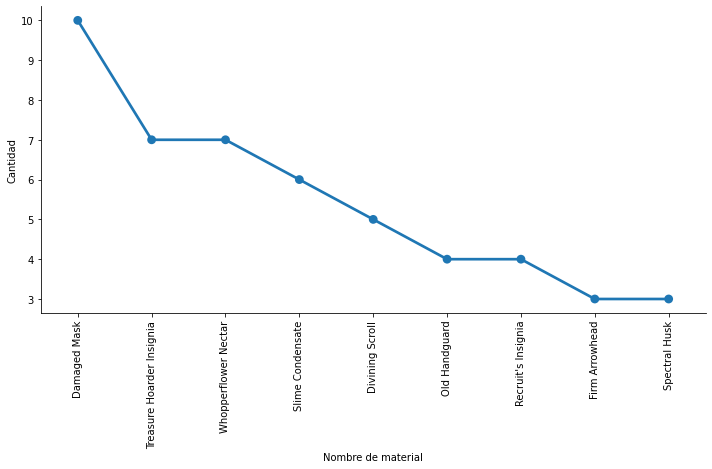

In [9]:
ascension=df[['ascension_enemy_mat']].value_counts().reset_index()


ascension.rename(columns={'ascension_enemy_mat':'ascension_mat',0:'quantity'},inplace=True)

sns.catplot(kind='point',data=ascension,x='ascension_mat',y='quantity',aspect=2)
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
plt.xlabel('Nombre de material')
plt.show()